In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading Cleaned Dataset
df = pd.read_csv("Main.csv")
df.head()

,Unnamed: 0,customer_id,trans_date,tran_amount,response,month,month_year
0,0,CS5295,2013-02-11,35,1,2,2013-02
1,1,CS4768,2015-03-15,39,1,3,2015-03
2,2,CS2122,2013-02-26,52,0,2,2013-02
3,3,CS1217,2011-11-16,99,0,11,2011-11
4,4,CS1850,2013-11-20,78,0,11,2013-11


In [4]:
df = df.drop(columns=["Unnamed: 0"])
# deoping unnecessary column

In [5]:
df["trans_date"] = pd.to_datetime(df["trans_date"])
#converting date column

# TABULAR REPORTS

**Total sales by month-year**

In [6]:
sales_by_month = df.groupby("month_year")["tran_amount"].sum().reset_index()
sales_by_month.head()

,month_year,tran_amount
0,2011-05,98901
1,2011-06,174527
2,2011-07,178038
3,2011-08,188605
4,2011-09,169173


**Sales by customer response**

In [7]:
sales_by_response = df.groupby("response")["tran_amount"].sum().reset_index()
sales_by_response

,response,tran_amount
0,0,7166830
1,1,955548


**Top 10 customers by spending**

In [8]:
top_customers = df.groupby("customer_id")["tran_amount"].sum().sort_values(ascending=False).head(10)
top_customers

customer_id
CS4424    2933
CS4320    2647
CS5752    2612
CS4660    2527
CS3799    2513
CS5109    2506
CS4074    2462
CS3805    2453
CS4608    2449
CS5555    2439
Name: tran_amount, dtype: int64

# VISUAL REPORTS

**Monthly Sales Trend**

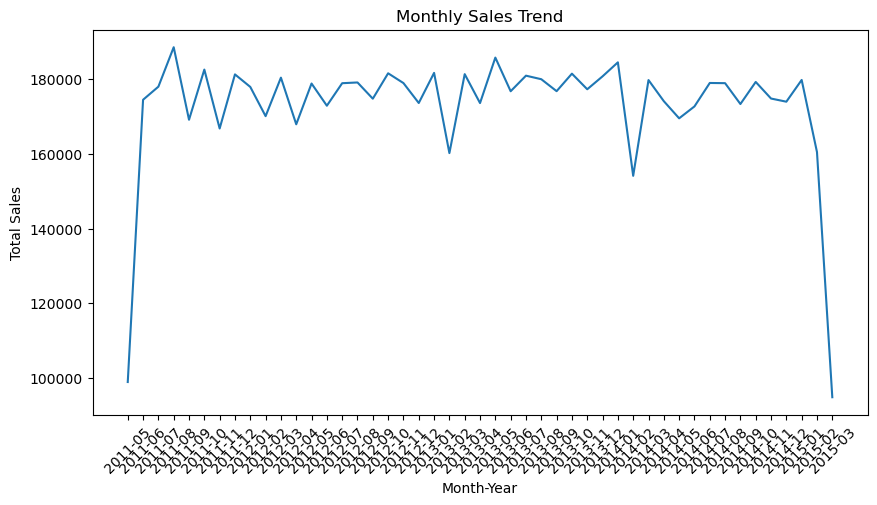

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(sales_by_month["month_year"], sales_by_month["tran_amount"])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.show()

**Sales Comparison: Response vs No Response**

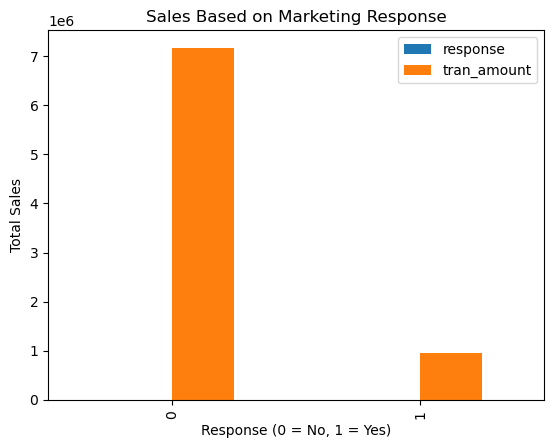

In [10]:
sales_by_response.plot(kind="bar")
plt.title("Sales Based on Marketing Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Total Sales")
plt.show()

**Top Customers Bar Chart**

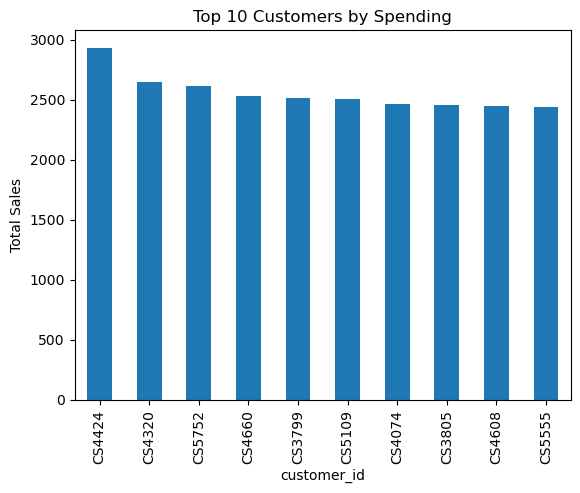

In [11]:
top_customers.plot(kind="bar")
plt.title("Top 10 Customers by Spending")
plt.ylabel("Total Sales")
plt.show()

# KPI METRICS

In [12]:
total_sales = df["tran_amount"].sum()
avg_transaction = df["tran_amount"].mean()
total_customers = df["customer_id"].nunique()
response_rate = df["response"].mean() * 100

total_sales, avg_transaction, total_customers, response_rate

(np.int64(8122378),
 np.float64(64.99514279541326),
 6884,
 np.float64(11.076346934039643))

# ADVANCED INSIGHTS"

**Response Impact on Spending**

In [14]:
df.groupby("response")["tran_amount"].mean()

response
0    64.492248
1    69.032510
Name: tran_amount, dtype: float64

Customers who responded to marketing spend more than non-responders.

**Monthly Growth Rate**

In [15]:
sales_by_month["growth_rate"] = sales_by_month["tran_amount"].pct_change()
sales_by_month.head()

,month_year,tran_amount,growth_rate
0,2011-05,98901,NaN
1,2011-06,174527,0.764664
2,2011-07,178038,0.020117
3,2011-08,188605,0.059352
4,2011-09,169173,-0.103030


REPORT SUMMARY:

1. Total sales show strong seasonal trends.
2. Customers who responded to marketing campaigns spend more.
3. November and December record peak sales.
4. A small group of customers contributes a large portion of revenue.

BUSINESS RECOMMENDATION:
Focus marketing on high-value customers and peak seasonal months.

In [16]:
sales_by_month.to_csv("monthly_sales_report.csv")
top_customers.to_csv("top_customers_report.csv")